In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [43]:
import matplotlib.pyplot as plt

In [19]:
################################################
# 1. Exploratory Data Analysis
################################################

df = pd.read_csv("../datasets/diabetes.csv")

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.shape

(768, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [24]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [25]:
df.groupby("Outcome")["Pregnancies"].agg(["mean", "std"])

,mean,std
Outcome,,
0,3.298000,3.017185
1,4.865672,3.741239


In [26]:
################################################
# 2. Data Preprocessing & Feature Engineering
################################################

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_scaled = StandardScaler().fit_transform(X)

In [27]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [29]:
################################################
# 3. Modeling & Prediction
###############################################

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)

KNeighborsClassifier()

In [30]:
random_user = X.sample(1, random_state=45)
knn_model.predict(random_user)

array([1], dtype=int64)

In [31]:
################################################
# 4. Model Evaluation
################################################

y_pred = knn_model.predict(X)

y_prob = knn_model.predict_proba(X)[:, 1]

In [32]:
print(classification_report(y, y_pred))
# acc 0.83
# f1 0.74
# AUC
roc_auc_score(y, y_prob)
# 0.90

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



0.9017686567164179

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
error_rates = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

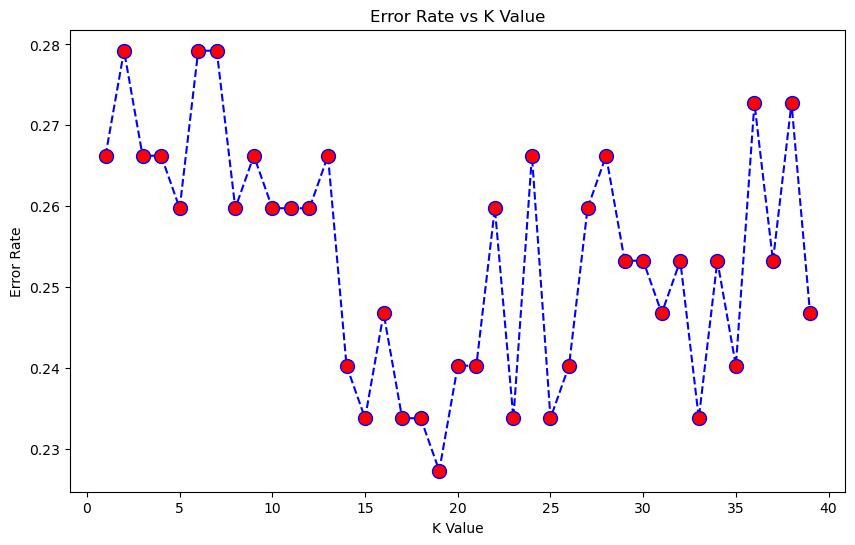

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rates, color="blue", linestyle="dashed",
         marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [50]:
cv_results = cross_validate(knn_model,
                           X_train, y_train,
                           cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [52]:
cv_results["test_accuracy"].mean()

0.7394642143142743

In [53]:
cv_results["test_f1"].mean()

0.5832622742992395

In [54]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [55]:
knn_params = {"n_neighbors": range(2, 40)}

knn_gs_best = GridSearchCV(knn_model, 
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1
                          ).fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


In [56]:
knn_gs_best.best_params_

{'n_neighbors': 27}

In [57]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X_train, y_train)

In [58]:
cv_results = cross_validate(knn_final,
                           X_train, y_train,
                           cv=5,
                           scoring=["accuracy", "f1", "roc_auc"])

In [59]:
cv_results['test_accuracy'].mean()

0.7589630814340931

In [60]:
cv_results['test_f1'].mean()

0.5766154190097852

In [61]:
random_user = X.sample(1)

In [63]:
knn_final.predict(random_user)

array([0], dtype=int64)